# Normalization

<b> Mai-Linh Ton </b>

In [1]:
library(Matrix)
library(scran)
library(scater)
library(igraph)
library(BiocParallel)
##helps speed up processing time##
ncores = 16
mcparam = SnowParam(workers = ncores)
register(mcparam)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:Matrix’:

    which


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, r

Warning message:
“'calcAverage' is deprecated.
Use 'calculateAverage' instead.
See help("Deprecated")”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   16.00   15.97   21.00   43.00 

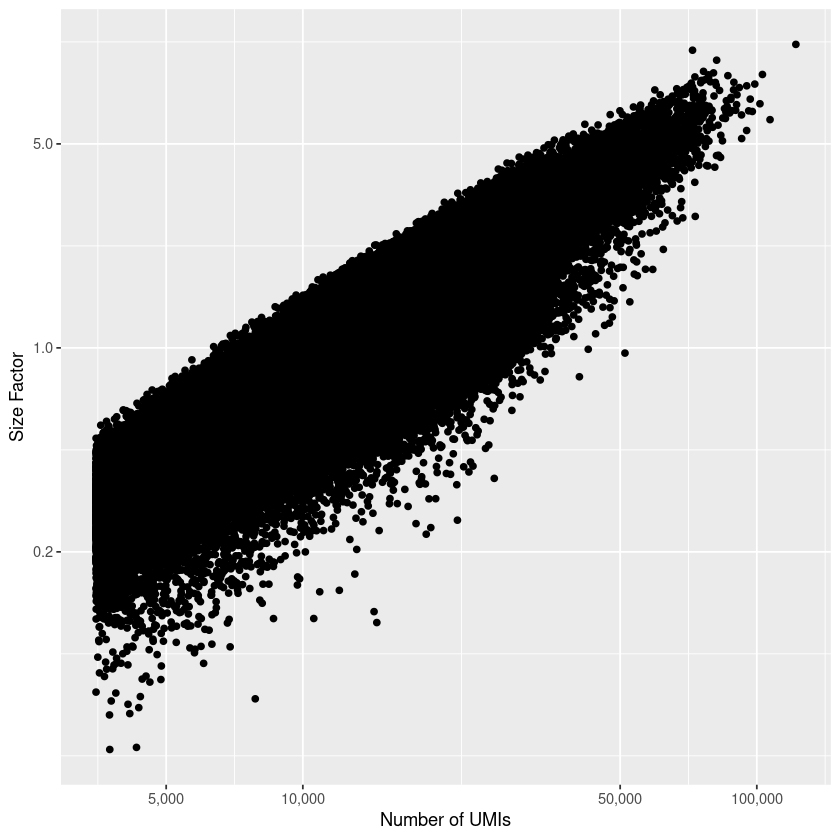

In [3]:
#normalize, taking into account size factor, pipeline from Pijuan-Sala et al. 2019#
#core_functions adopted from Jonny's code in the paper#
source("/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/core_functions.R")
load_data(normalise = FALSE)

lib.sizes = Matrix::colSums(counts(sce))
sce = sce[calcAverage(sce)>0.1,]

clusts = as.numeric(quickCluster(sce, method = "igraph", min.size = 100, BPPARAM = mcparam))
summary(clusts)

min.clust = min(table(clusts))/2
new_sizes = c(floor(min.clust/3), floor(min.clust/2), floor(min.clust))
sce = computeSumFactors(sce, clusters = clusts, sizes = new_sizes, max.cluster.size = 3000)


ggplot(data = data.frame(X = lib.sizes, Y = sizeFactors(sce)),
              mapping = aes(x = X, y = Y)) +
  geom_point() +
  scale_x_log10(breaks = c(5000, 10000, 50000, 100000), labels = c("5,000", "10,000", "50,000", "100,000") ) +
  scale_y_log10(breaks = c(0.2, 1, 5)) +
  labs(x = "Number of UMIs", y = "Size Factor")

write.table(sizeFactors(sce), quote = F, col.names = F, row.names = F, file = "/rds/project/bg200/rds-bg200-hphi-gottgens/users/mlnt2/PhD_MT06/sizefactors.tab")